# Summary statistics

We continue with the MPG data for illustrations.

In [1]:
import pandas as pd
import seaborn as sns

cars = sns.load_dataset("mpg")

The `describe` method of a data frame gives summary statistics for each column of quantitative data.

In [2]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


You certainly know about the **mean** of values $x_1,\ldots,x_n$:

```{math}
:label: eq-statistics-mean
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i.
```

The "std" row of the summary table is a measurement of spread. First define the **variance** $\sigma^2$ as 

```{math}
:label: eq-statistics-var
\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2.
```

Variance is the average of the squares of deviations from the mean. As such, it has the units that are the square of the data, which can be hard to interpret. Its square root $\sigma$ is the **standard deviation** (STD), and it has the same units as the data. A small STD implies that the data values are all fairly close to the mean, while a large STD implies wider spread.

These statistics can be computed separately for grouped data. For example, the mean of MPG for the three regions in the data are

In [3]:
cars.groupby("origin")["mpg"].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

The mean in the U.S. is certainly smaller. But is the difference accounted for by how spread out the values are? We should at least compare to the standard deviation:

In [4]:
cars.groupby("origin")["mpg"].std()

origin
europe    6.723930
japan     6.090048
usa       6.402892
Name: mpg, dtype: float64

For data that are distributed normally, about 68% of the values lie within one standard deviation of the mean. The mean of the U.S. distribution is more than one STD less than the means from the other regions (although the data does not look like a normal distribution).

## z-scores

Given data values $x_1,\ldots,x_n$, we can define related values known as **standardized scores** or **z-scores**:

$$
z_i = \frac{x-\mu}{\sigma}, \ldots i=1,\ldots,n.
$$

The z-scores have mean zero and standard deviation equal to 1; in physical terms, they are dimensionless. This makes them attractive to work with and to compare across data sets.

In [5]:
def standardize(x):
    return (x-x.mean())/x.std()

cars["mpg_z"] = cars.groupby("origin")["mpg"].transform(standardize)
cars[["origin","mpg","mpg_z"]]

,origin,mpg,mpg_z
0,usa,18.0,-0.325405
1,usa,15.0,-0.793943
2,usa,18.0,-0.325405
3,usa,16.0,-0.637764
4,usa,17.0,-0.481585
...,...,...,...
393,usa,27.0,1.080210
394,europe,44.0,2.395708
395,usa,32.0,1.861107
396,usa,28.0,1.236389


The standardization occurred separately within each group, so that each histogram is now centered at zero.

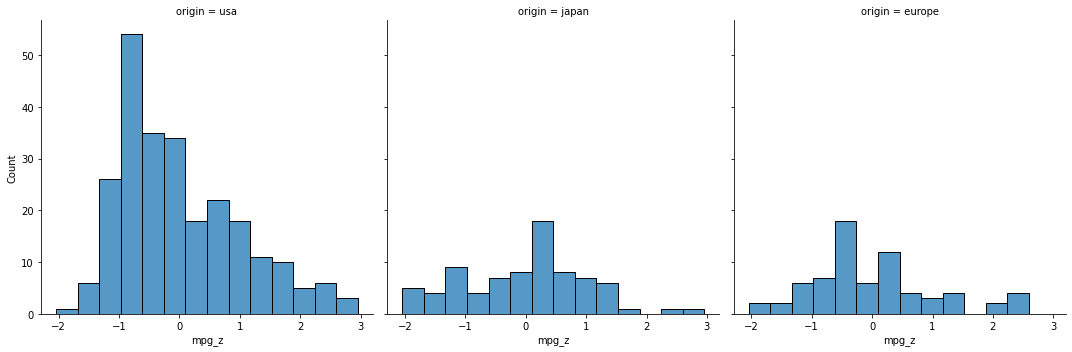

In [6]:
sns.displot(data=cars,x="mpg_z",col="origin")

In [7]:
cars.groupby("origin")["mpg_z"].mean()

origin
europe   -2.918301e-16
japan     1.365293e-15
usa       1.161053e-15
Name: mpg_z, dtype: float64

(Recall that floating-point values are rounded to 15–16 digits.)


## Populations and samples

In statistics one refers to the **population** as the entire universe of available values. Thus, the ages of everyone on Earth at some instant has a particular mean and standard deviation. However, in order to estimate those values, we can only measure a **sample** of the population directly. 

It can be proved that {eq}`eq-statistics-mean` is an accurate way to estimate the mean of a population, in a particular precise sense. If, in a thought experiment, we could average this estimate over all possible samples of size $n$, the result would be exactly the population mean. 

However, if we use the formula {eq}`eq-statistics-var` to compute variance of a sample, and average over all possible sample sets, we would *not* get the variance of the population; we call this a **biased estimator**. The unbiased estimator for variance is

```{math}
:label: eq-statistics-var-sample
\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2.
```

As you can see from the formulas, the difference between variance and sample variance is small when the sample size $n$ is large. The `std` and `var` methods in pandas all calculate sample standard deviations and variances.

## Quantiles and percentiles

Mean, variance, and standard deviation are not the most relevant statistics for every data set. There are many alternatives.

For any $0<p<1$, the $100p$-**percentile** is the value of $x$ such that $p$ is the probability of observing a population value less than or equal to $x$. In other words, percentiles are the inverse function of the CDF. 

The 50th percentile is known as the **median** of the population. The unbiased sample median of $x_1,\ldots,x_n$ can be computed by sorting the values into $y_1,\ldots,y_n$. If $n$ is odd, then $y_{(n+1)/2}$ is the sample median; otherwise, the average of $y_{n/2}$ and $y_{1+(n/2)}$ is the sample median. Computing unbiased sample estimates of percentiles other than the median is a little complicated, and we won't go into the details.

```{prf:example}
If the sorted values are $1,3,3,4,5,5,5$, then $n=7$ and the sample median is $y_4=4$. If the sample values are $1,3,3,4,5,5,5,9$, then $n=8$ and the sample median is $(4+5)/2=4.5$.
```

A set of percentiles dividing probability into $q$ equal pieces is called the $q$–**quantiles**.

```{prf:example}
The 4-quantiles are called **quartiles**. The first quartile is the 25th percentile, or the value that exceeds 1/4 of the population. The second quartile is the median. The third quantile is the 75th percentile. 

Sometimes the definition is extended to the *zeroth quartile*, which is the minimum sample value, and the *fourth quartile*, which is the maximum sample value.
```

```{warning}
If this isn't confusing enough yet, sometimes the word *quantile* is casually used to mean *percentile*.
```

One way to measure spread in the values is the **interquartile range** (IQR), which is the difference between the 75th percentile and the 25th percentile. For some distributions, the median and IQR might be a good substitute for the mean and standard deviation.

A common way to visualize quartiles is by a **box plot**.

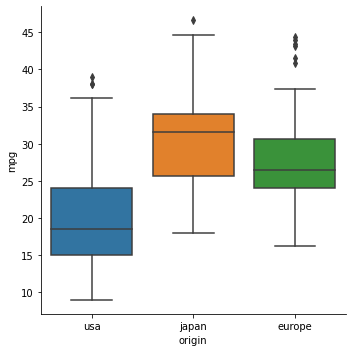

In [8]:
sns.catplot(data=cars,x="origin",y="mpg",kind="box")

The colored boxes in each category show the quartiles, with the interior horizontal line showing the median. The "whiskers" and dots are explained in the next section. 

An alternative to a box plot is a **violin plot**.

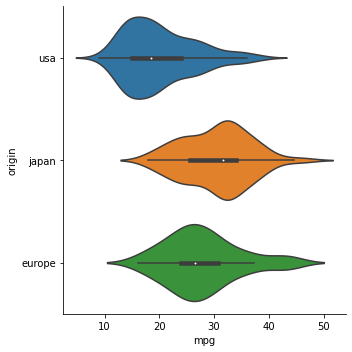

In [9]:
sns.catplot(data=cars,x="mpg",y="origin",kind="violin")

In a violin plot, the inner lines still show the same information as the box plot, and the sides of the "violins" are KDE estimates of the continuous distributions.